# ==============================
# Clustering baseado em Densidade (DBSCAN)
# ============================== 
# Este notebook aplica o algoritmo DBSCAN aos dados estelares
# normalizados e avalia o desempenho usando Silhouette Score,
# considerando a presença de ruído.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
# ==========================================================
# 2. Carregar dados previamente escalados
# ==========================================================

# X_scaled deve conter apenas variáveis numéricas padronizadas
X_scaled = pd.read_csv("../results/X_scaled.csv", index_col=0)

print("Dados carregados com sucesso.")
print("Dimensão dos dados:", X_scaled.shape)

Dados carregados com sucesso.
Dimensão dos dados: (1000, 4)


In [7]:
# ==========================================================
# 3. Aplicar DBSCAN
# ==========================================================

# eps: raio máximo da vizinhança
# min_samples: número mínimo de pontos para formar região densa
# metric: distância utilizada (euclidiana - padrão)

dbscan = DBSCAN(
    eps=1.2,
    min_samples=10,
    metric='euclidean'
)

labels_db = dbscan.fit_predict(X_scaled)

print("\nDBSCAN aplicado.")


DBSCAN aplicado.


In [8]:
# ==========================================================
# 4. Analisar distribuição dos clusters
# ==========================================================

unique, counts = np.unique(labels_db, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

print("\nDistribuição dos clusters:")
print(cluster_distribution)

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(f"\nNúmero de clusters encontrados (sem contar ruído): {n_clusters}")


Distribuição dos clusters:
{0: 815, 1: 25, 2: 44, 3: 37, 4: 26, 5: 36, 6: 17}

Número de clusters encontrados (sem contar ruído): 7


In [9]:
# ==========================================================
# 5. Avaliação com Silhouette Score
# ==========================================================

# Remover ruído (-1)
mask = labels_db != -1

if len(set(labels_db[mask])) > 1:
    sil_db = silhouette_score(X_scaled[mask], labels_db[mask])
    print(f"\nSilhouette Score (DBSCAN): {sil_db:.3f}")
else:
    sil_db = None
    print("\nSilhouette não pode ser calculado (menos de 2 clusters válidos).")


Silhouette Score (DBSCAN): 0.583


In [10]:
# ==========================================================
# 6. Salvar resultado da avaliação
# ==========================================================

results_db = pd.DataFrame({
    "Algoritmo": ["DBSCAN"],
    "Número de Clusters": [n_clusters],
    "Silhouette Score": [sil_db]
})

results_db.to_csv("../results/dbscan_results.csv", index=False)

print("\nResultados salvos em dbscan_results.csv")


Resultados salvos em dbscan_results.csv


In [11]:
# ==========================================================
# 7. Salvar labels geradas
# ==========================================================

labels_db_df = pd.DataFrame(
    labels_db,
    index=X_scaled.index,
    columns=["cluster_dbscan"]
)

labels_db_df.to_csv("../results/labels_dbscan.csv")

print("Labels salvas em labels_dbscan.csv")

Labels salvas em labels_dbscan.csv


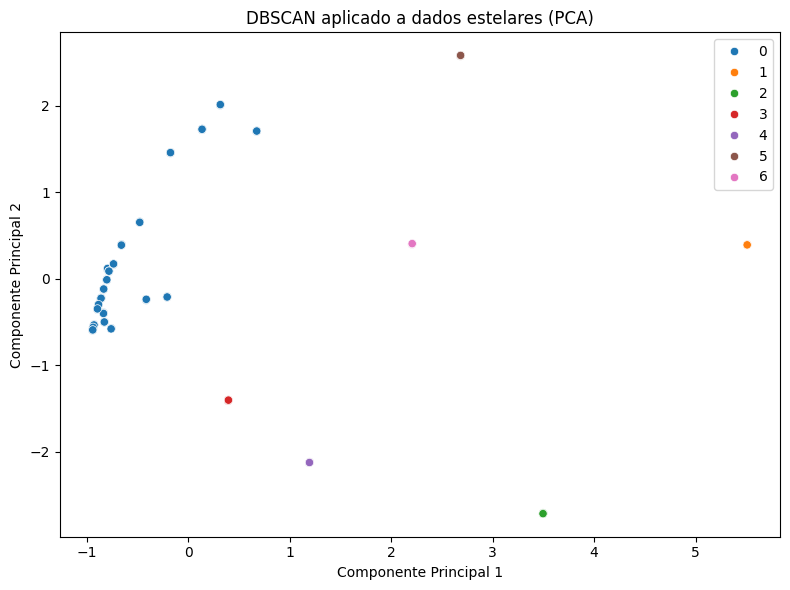

In [12]:
# ==========================================================
# 8. Visualização com PCA (redução para 2D)
# ==========================================================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_db,
    palette="tab10",
    legend="full"
)

plt.title("DBSCAN aplicado a dados estelares (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.show()